In [2]:
from nnS_lib import *
import matplotlib.pyplot as plt, mpld3
%matplotlib inline

/Library/Python/2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Library/Python/2.7/site-packages/ipykernel/pylab/config.py:114: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  """)


In [3]:
def showResults(Expts, ModelSizeOrig):
    # mpld3.enable_notebook()
    # mpld3.disable_notebook()
    for Expt in Expts:
        CompRatio = [(ModelSizeOrig*1.0)/trial['size'] for trial in Expt['Trials']]
        fig = plt.figure()
        fig = plt.scatter(CompRatio, Expt['accuracies'], label = Expt['name'])
        ax = fig.axes.set_xlabel('Compression Ratio')
        ax = fig.axes.set_ylabel('accuracy')

In [4]:
# Load the trained model and saved weights

caffe_root = './'  # this file is expected to be in {caffe_root}
caffe.set_mode_cpu()
net = caffe.Net(caffe_root + 'examples/mnist/lenet_train_test.prototxt',
                caffe_root + 'examples/mnist/lenet_iter_10000.caffemodel',
                caffe.TEST)

In [5]:
# Save the weights to a mat file - Done already

# mdict = {}
# for lyr in net.params:
#     mdict[lyr] = net.params[lyr][0].data
    
# mdict_top = {}
# mdict_top['Weights'] = mdict
ModelSizeOrig = 1722704

WeightMat = 'LeNet_weights.mat'
# scipy.io.savemat(WeightMat, mdict_top)

In [6]:
# Design experiments and save the parameters to a mat file

# Experiment 1
Expt1 = {}
Expt1['name'] = 'Expt1'
Expt1['mode'] = 'dropLow'
Expt1['xVar_interp'] = 'Drop bottom xVar fraction overall'
Expt1['xVars'] = [0, 1]


# Experiment 2
Expt2 = {}
Expt2['name'] = 'Expt2'
Expt2['mode'] = 'dropOutputwise'
Expt2['xVar_interp'] = 'Drop bottom xVar fraction outputwise'
Expt2['xVars'] = [0, 1]


# Experiment 3
Expt3 = {}
Expt3['name'] = 'Expt3'
Expt3['mode'] = 'LowRank_incoh'
Expt3['xVar_interp'] = 'incoherence'
Expt3['xVars'] = [10, 100]


# Experiment 4
Expt4 = {}
Expt4['name'] = 'Expt4'
Expt4['mode'] = 'LowRankSparse'
Expt4['xVar_interp'] = 'Maximum rank of the low rank component'
Expt4['xVars'] = [10, 100]

# Experiment 5
Expt5 = {}
Expt5['name'] = 'Expt5'
Expt5['mode'] = 'LowRank'
Expt5['xVar_interp'] = 'Maximum rank of the low rank component'
Expt5['xVars'] = [10, 100]

# Experiment 6
Expt6 = {}
Expt6['name'] = 'Expt6'
Expt6['mode'] = 'quantize'
Expt6['xVar_interp'] = 'Bits to store each element'
Expt6['xVars'] = [4, 32]

# Experiment 7
Expt7 = {}
Expt7['name'] = 'Expt7'
Expt7['mode'] = 'LowRankSparseQuantizeBoth'
Expt7['xVar_interp'] = 'Maximum rank of the low rank component'
Expt7['xVars'] = [10, 100]

Expt1
Expt2

Expt1
0 0.991100005507
1 0.0974000002816

Expt2
0 0.991100005507
1 0.0974000002816


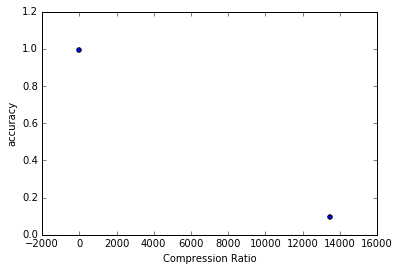

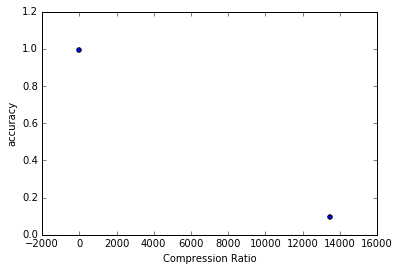

In [7]:
# Expts = [Expt1, Expt2, Expt3, Expt4, Expt5, Expt6, Expt7]
Expts = [Expt1, Expt2]
prefix = 'test_LeNet'
prepareExperiments(Expts, prefix)
runExperiments(Expts, net, WeightMat)
showResults(Expts, ModelSizeOrig)